# Exercise 1

This dataset contains the chemical fingerprint of different samples of glass belonging to different classes. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence. If it is correctly identified!

### Attribute Information:
- Id number: 1 to 214
- RI: refractive index
- Na: Sodium
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type of glass (class attribute):
  1. building_windows_float_processed
  2. building_windows_non_float_processed
  3. vehicle_windows_float_processed
  4. vehicle_windows_non_float_processed (none in this database)
  5. containers
  6. tableware
  7. headlamps


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset with column names
data = pd.read_csv('./data/glass.data', names=['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

# Display the first few rows of the dataset
data.head()


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:

# Extract labels (Type column)
labels = data['Type'].values  # Create a vector of labels

# Extract features (all columns except Id and Type)
features = data.drop(columns=['Id', 'Type']).values  # Create a matrix for normalization and PCA

# Check the results
print("Labels (vector):", labels[:5])  # Print the first few labels
print("Features (matrix):\n", features[:5])  # Print the first few rows of the features matrix


Labels (vector): [1 1 1 1 1]
Features (matrix):
 [[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
  8.75000e+00 0.00000e+00 0.00000e+00]
 [1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01 4.80000e-01
  7.83000e+00 0.00000e+00 0.00000e+00]
 [1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01 3.90000e-01
  7.78000e+00 0.00000e+00 0.00000e+00]
 [1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01 5.70000e-01
  8.22000e+00 0.00000e+00 0.00000e+00]
 [1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01 5.50000e-01
  8.07000e+00 0.00000e+00 0.00000e+00]]


In [9]:
labels.shape

(214,)

In [8]:
features.shape

(214, 9)

### Questions:

1. Extract the samples of type class 1 (building_windows_float_processed) and 7 (headlamps). How many samples belong to the two groups?

In [15]:
# Extract samples of type class 1 and 7
class_1_samples = data[data['Type'] == 1]  # Samples of class 1
class_7_samples = data[data['Type'] == 7]  # Samples of class 7

# Count the number of samples in each group
num_class_1 = len(class_1_samples)
num_class_7 = len(class_7_samples)

# Print the results
print(f"Number of samples in class 1 (building_windows_float_processed): {num_class_1}")
print(f"Number of samples in class 7 (headlamps): {num_class_7}")

Number of samples in class 1 (building_windows_float_processed): 70
Number of samples in class 7 (headlamps): 29


In [14]:
np.logical_or(labels == 1, labels == 7)

filtered_features = features[np.logical_or(labels == 1, labels == 7)]
filtered_features.shape

(99, 9)

2. Normalize the data so that each feature has zero mean and unitary standard deviation.


In [28]:
A = np.array(filtered_features)
A = A.T
A_norm = (A - np.mean(A, axis=0)) / np.std(A, axis=0)
pd.DataFrame(A_norm)

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,-0.445686,-0.440026,-0.438055,-0.439630,-0.437791,-0.439996,-0.437922,-0.436866,-0.444373,-0.439728,...,-0.434337,-0.436561,-0.436145,-0.439026,-0.437882,-0.440104,-0.436623,-0.434194,-0.433589,-0.435251
1,0.108910,0.118356,0.102323,0.089397,0.090276,0.068300,0.091350,0.084527,0.126112,0.077312,...,0.163964,0.164816,0.163724,0.141004,0.138933,0.129263,0.163081,0.137807,0.137821,0.131794
2,-0.309818,-0.346045,-0.346575,-0.341341,-0.343318,-0.345585,-0.344373,-0.343078,-0.350476,-0.345958,...,-0.501862,-0.504491,-0.503912,-0.507445,-0.505932,-0.508490,-0.504492,-0.501940,-0.500954,-0.502920
3,-0.464953,-0.447139,-0.436984,-0.449930,-0.450256,-0.435305,-0.454876,-0.457823,-0.451170,-0.446822,...,-0.400764,-0.423906,-0.420346,-0.425431,-0.382972,-0.378594,-0.415453,-0.411948,-0.414777,-0.410144
4,2.769546,2.773881,2.776817,2.776984,2.777663,2.781543,2.777112,2.777902,2.770583,2.778583,...,2.762692,2.763248,2.763215,2.775804,2.763269,2.766422,2.764468,2.768964,2.768883,2.769225
5,-0.512546,-0.486854,-0.488711,-0.482507,-0.481259,-0.479489,-0.480031,-0.479338,-0.488076,-0.482395,...,-0.501862,-0.504491,-0.503912,-0.443907,-0.505932,-0.504881,-0.504492,-0.501940,-0.500954,-0.502920
6,-0.114869,-0.155139,-0.156310,-0.136378,-0.143370,-0.144504,-0.139089,-0.135551,-0.135419,-0.129820,...,-0.113946,-0.119024,-0.116469,-0.215891,-0.081855,-0.094446,-0.128647,-0.125933,-0.124263,-0.118434
7,-0.515292,-0.508517,-0.506253,-0.508297,-0.505972,-0.508343,-0.506085,-0.504887,-0.513591,-0.508061,...,-0.472023,-0.435098,-0.442243,-0.377665,-0.481699,-0.460681,-0.433350,-0.428877,-0.431213,-0.428431
8,-0.515292,-0.508517,-0.506253,-0.508297,-0.505972,-0.496621,-0.506085,-0.504887,-0.513591,-0.503108,...,-0.501862,-0.504491,-0.503912,-0.507445,-0.505932,-0.508490,-0.504492,-0.501940,-0.500954,-0.502920


3. Perform PCA on the dataset (do not consider the "Id" as a feature!) by means of the SVD decomposition.

   Then, plot the trend of the singular values $ \sigma_k $, the cumulate fraction of singular values 
   $$
   \frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^q \sigma_i}
   $$
   and the fraction of the "explained variance":
   $$
   \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^q \sigma_i^2}.
   $$

Text(0.5, 1.0, 'Explained Variance')

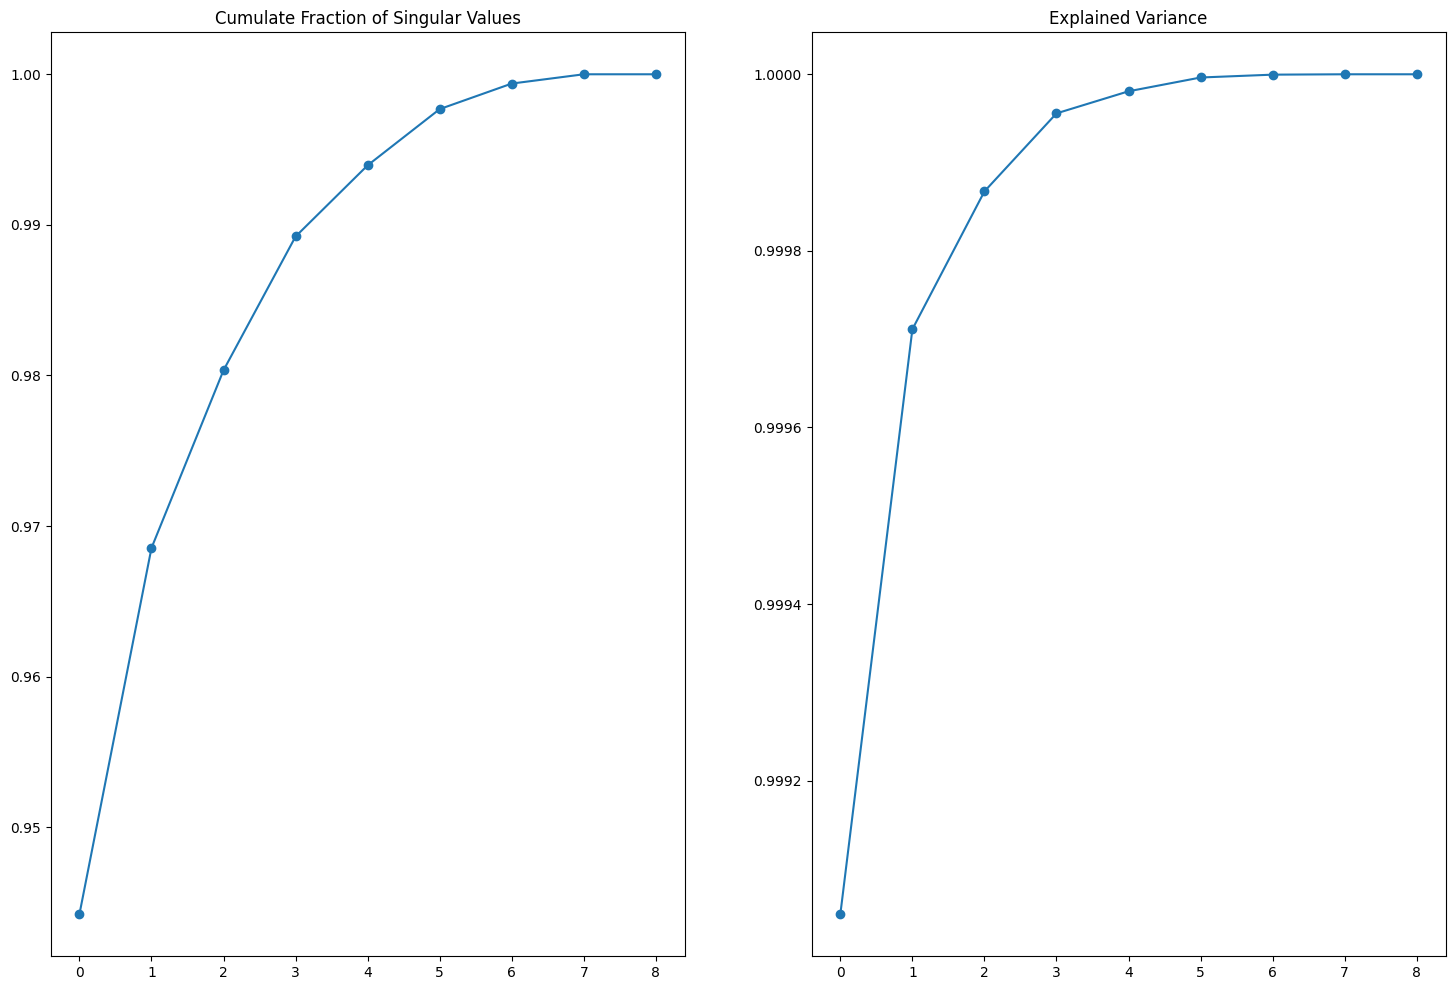

In [29]:
U, s, VT = np.linalg.svd(A_norm, full_matrices=False)

fig, axs = plt.subplots(1,2, figsize=(18,12))

axs[0].plot(np.cumsum(s) / np.sum(s), 'o-')
axs[0].set_title('Cumulate Fraction of Singular Values')


axs[1].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')
axs[1].set_title('Explained Variance')


4. Compute a matrix containing the principal components associated with the dataset.


In [33]:
Phi = U.T @ A_norm
Phi.shape

(9, 99)


5. Generate a scatterplot of the first two principal components of the dataset, grouped by label.

In [38]:
filtered_labels = labels[np.logical_or(labels==1, labels==7)]


In [40]:
filtered_labels.shape

(99,)

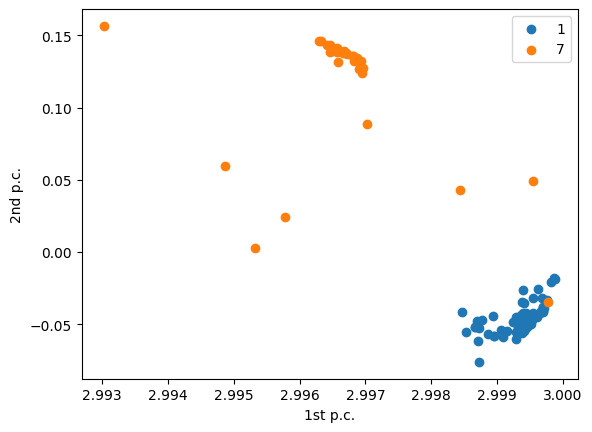

In [41]:
filtered_labels = labels[np.logical_or(labels==1, labels==7)]
for g in (1,7):
  plt.scatter(Phi[0, filtered_labels == g], Phi[1, filtered_labels == g], label = g)
plt.xlabel('1st p.c.')
plt.ylabel('2nd p.c.')
plt.legend()

---

Let'see the other way around

In [42]:
A = np.array(filtered_features)
A_norm = (A - np.mean(A, axis=0)) / np.std(A, axis=0)
pd.DataFrame(A_norm)

,0,1,2,3,4,5,6,7,8
0,1.132000,0.059471,1.206301,-0.631648,-1.329077,-0.874494,0.058822,-0.531145,-0.563065
1,-0.261983,0.380845,0.616570,-0.155275,0.013130,0.170075,-1.219816,-0.531145,-0.563065
2,-0.848275,-0.081934,0.583439,0.174522,0.380470,-0.053761,-1.289307,-0.531145,-0.563065
3,-0.241483,-0.493294,0.676206,-0.283529,-0.156412,0.393912,-0.677785,-0.531145,-0.563065
4,-0.339882,-0.416164,0.629822,-0.375139,0.507627,0.344170,-0.886258,-0.531145,-0.563065
...,...,...,...,...,...,...,...,...,...
94,-0.827775,0.702220,-1.768857,2.629675,-0.156412,-0.824752,0.656446,1.263971,-0.563065
95,-0.573579,1.704910,-1.768857,0.999014,0.479370,-1.023718,-0.427617,2.161529,-0.563065
96,0.984402,0.985030,-1.768857,1.053980,0.987995,-1.023718,-0.372024,2.246204,-0.563065
97,-0.712977,1.010740,-1.768857,0.907404,1.256437,-1.023718,-0.316431,2.127659,-0.563065


Text(0.5, 1.0, 'Explained Variance')

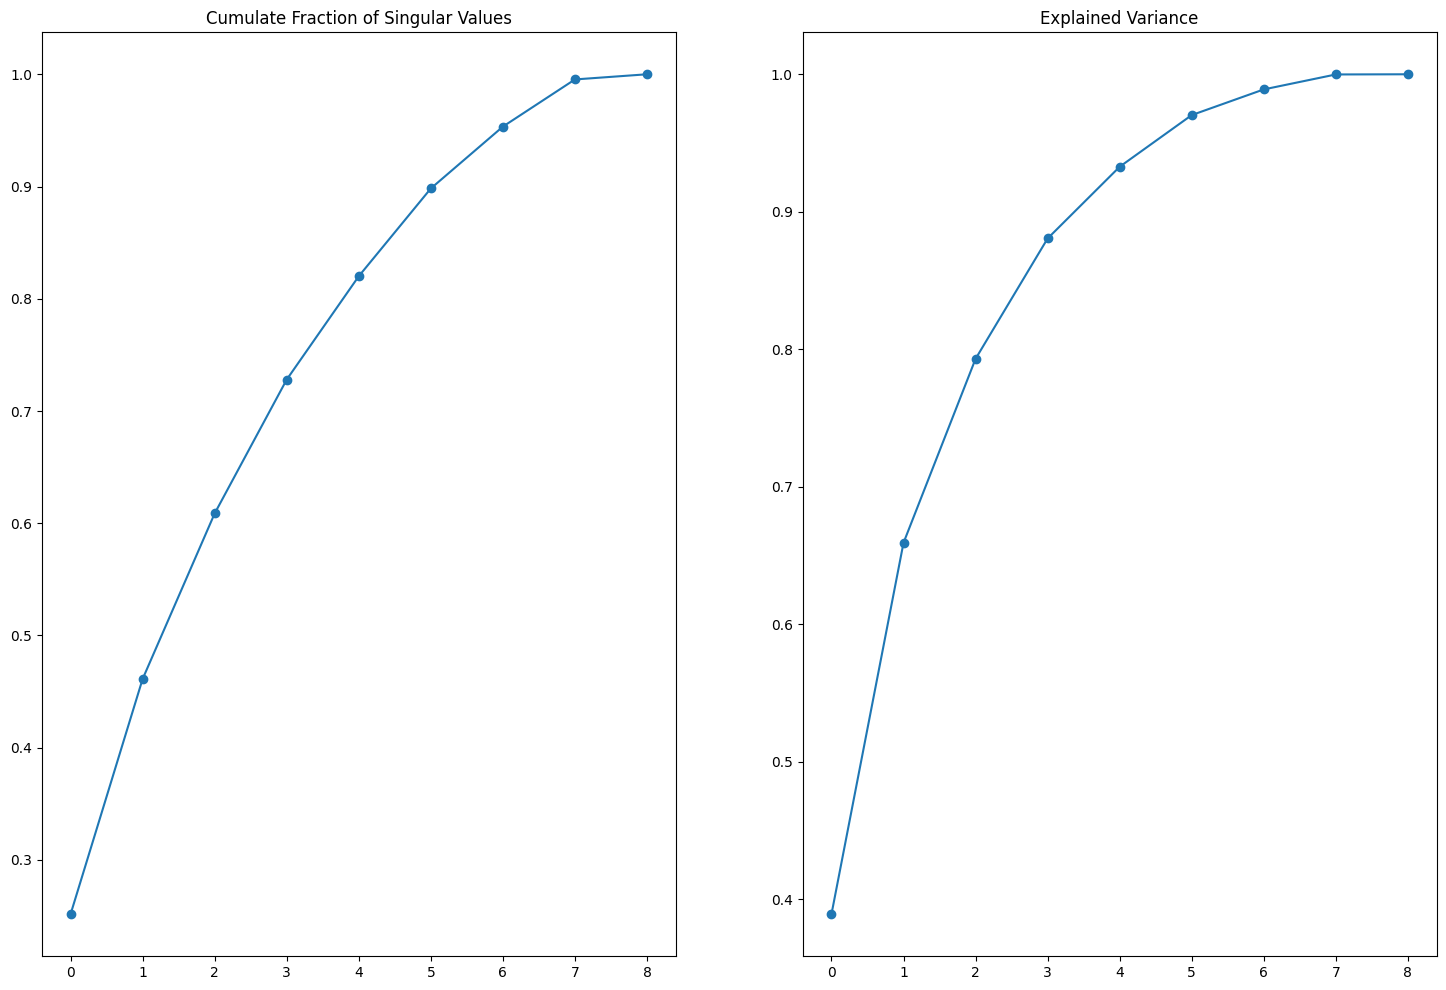

In [43]:
U, s, VT = np.linalg.svd(A_norm, full_matrices=False)

fig, axs = plt.subplots(1,2, figsize=(18,12))

axs[0].plot(np.cumsum(s) / np.sum(s), 'o-')
axs[0].set_title('Cumulate Fraction of Singular Values')


axs[1].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')
axs[1].set_title('Explained Variance')


In [57]:
Phi = A_norm @ VT.T # Phi = U @ np.diag(s)
Phi.shape

(99, 9)

In [55]:
Phi = U @ np.diag(s)

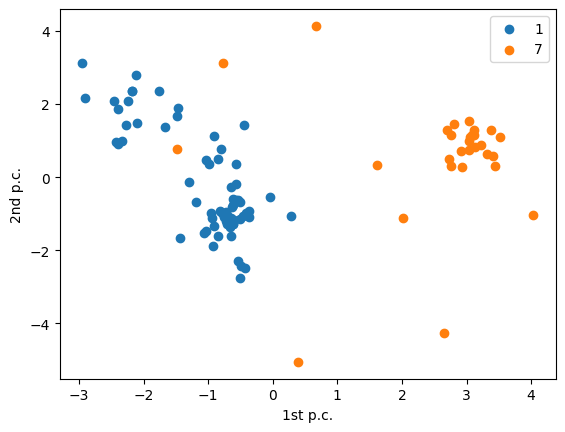

In [58]:
filtered_labels = labels[np.logical_or(labels==1, labels==7)]
for g in (1,7):
  plt.scatter(Phi[filtered_labels == g, 0], Phi[filtered_labels == g, 1], label = g)
plt.xlabel('1st p.c.')
plt.ylabel('2nd p.c.')
plt.legend()


6. Consider now the first principal component. By looking at the components of the first principal direction, do you expect building windows float processed glasses to have a large or small concentration of magnesium and aluminum, respectively? And what about headlamps glasses?

Columns of V are the left singular vectors, and they are the principal directions.

In [49]:
V = VT.T
print(V.shape)

(9, 9)


In [50]:
attributes = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
pd.DataFrame({"attribute": attributes, "1st dir.": V[:, 0]})


,attribute,1st dir.
0,RI,-0.329633
1,Na,0.324806
2,Mg,-0.485575
3,Al,0.475118
4,Si,0.247701
5,K,-0.075897
6,Ca,-0.225984
7,Ba,0.432669
8,Fe,-0.137605


As we can see from the scatter plot of the samples of class 1, they all have a first principal component that is below 0, while samples of class 7 have a first principal component that is above 0.

We can see that along the first direction the Magnesium has a negative weight, while Aluminum has a positive one: this may suggest that samples from class 1 ("building_windows_float_processed"), since they all have a negative first principal component, have a higher concentration of Magnesium, while on the other hand samples from class 2 ("headlamps"), which all have positive principal components, have a higher concentration of Aluminium.

7. Are your predictions confirmed by the original data?

In [54]:
data[data["Type"] == 1]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
65,66,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.0,0.00,1
66,67,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,1
67,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
68,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1


In [51]:
print(data[data["Type"] == 1][["Mg", "Al"]])

      Mg    Al
0   4.49  1.10
1   3.60  1.36
2   3.55  1.54
3   3.69  1.29
4   3.62  1.24
..   ...   ...
65  3.59  1.12
66  3.65  0.87
67  3.65  0.87
68  3.58  0.90
69  3.58  0.82

[70 rows x 2 columns]


In [53]:
data[data["Type"] == 7]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
185,186,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
186,187,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7
187,188,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
188,189,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7
189,190,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
190,191,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
191,192,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
192,193,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7
193,194,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
194,195,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7


In [52]:
print(data[data["Type"] == 7][["Mg", "Al"]])

       Mg    Al
185  3.20  1.81
186  3.26  2.22
187  3.34  1.23
188  2.20  2.06
189  1.83  1.31
190  1.78  1.79
191  0.00  2.38
192  0.00  2.79
193  0.00  2.00
194  0.00  1.98
195  0.00  2.68
196  0.00  2.54
197  0.00  2.34
198  0.00  2.66
199  0.00  2.51
200  0.00  2.25
201  0.00  1.19
202  0.00  2.42
203  0.00  1.99
204  0.00  2.27
205  0.00  1.80
206  0.00  1.87
207  0.00  1.82
208  0.00  2.74
209  0.00  2.88
210  0.00  1.99
211  0.00  2.02
212  0.00  1.94
213  0.00  2.08


print(data[data["Type"] == 7][["Mg", "Al"]])
